In [49]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [50]:
U, Tryk, Temp = np.genfromtxt('Usikkerheder.csv',delimiter=',', skip_header = 1,usecols=(0,1,2),unpack = True)

U_farmer = np.var(U)*10**-12 #[C]

T = np.mean(Temp[0:3])
P_hPa = np.mean(Tryk[0:3])
P = P_hPa/10
print(T, U_farmer)



24.366666666666664 5.69e-12


32 33 32


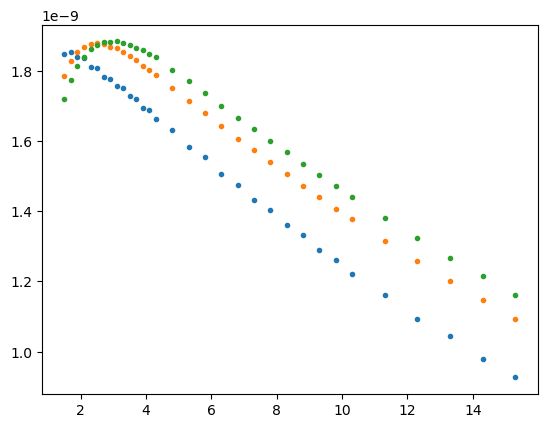

In [51]:
l_6,data_6 = np.genfromtxt('data_6V.csv',delimiter=',', skip_header = 1,usecols=(3,4),unpack = True)
l_10,data_10 = np.genfromtxt('data_10V.csv',delimiter=',', skip_header = 1,usecols=(3,4), unpack = True)
l_15,data_15 = np.genfromtxt('data_15V.csv',delimiter=',', skip_header = 1,usecols=(3,4), unpack = True)

print(len(l_6), len(l_10), len(l_15))
m_6 = data_6 *10**-12
m_10 = data_10 *10**-12
m_15 = data_15 *10**-12

l_10 =  l_10[:-1]
m_10 =  m_10[:-1]



plt.plot(l_6,m_6, '.')
plt.plot(l_10,m_10, '.')
plt.plot(l_15,m_15, '.')


In [52]:
# Konstanter til omregning til grey 
NDWQ0 = 5.3487* 10**7 #[Gy/C]
k_elektrometer = 0.9993
k_QQ0 = 0.991
k_pol = 1.0001
k_s = 1.0026
T_0 = 20 #grader
p_0 = 101.3 #[kPa]

U_baro = 1/10 #[kPa]
U_termo = 0.06 #[grader]
U_x = 0.001+0.1 



In [53]:

k_tp = ((273.2 + T)*p_0)/((273.2+T_0)*P)
print(k_tp)

U_k_tp = np.sqrt((p_0/((273.2+T_0)*P)*U_termo)**2+(-((273.2 + T)*p_0)/((273.2+T_0)*P**2)*U_baro)**2)
print(U_k_tp)

D_6 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_6
D_10 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_10
D_15 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_15

max_D = np.max(D_15)
Dp_6 = D_6/max_D * 100
Dp_10 = D_10/max_D *100
Dp_15 = D_15/max_D *100

print(D_6)

U_D6 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_6*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D10 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_10*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D15 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_15*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)

print(U_D6)


1.0152606181650488
0.0010232805005986664
[0.09975581 0.10007934 0.09932443 0.09916266 0.09776069 0.09759892
 0.09619695 0.09587342 0.0948489  0.09441752 0.09328516 0.09279986
 0.09134396 0.09102043 0.08978022 0.0880008  0.08541254 0.0838488
 0.08120662 0.07958896 0.07727031 0.07570657 0.073334   0.07182418
 0.06955945 0.06799571 0.06578491 0.06260351 0.05899073 0.05624071
 0.05273577 0.04993182]
[0.00032287 0.00032297 0.00032274 0.00032268 0.00032225 0.0003222
 0.00032177 0.00032167 0.00032136 0.00032124 0.0003209  0.00032076
 0.00032033 0.00032024 0.00031988 0.00031938 0.00031866 0.00031824
 0.00031755 0.00031713 0.00031655 0.00031616 0.00031559 0.00031524
 0.00031472 0.00031438 0.0003139  0.00031324 0.00031252 0.00031201
 0.00031139 0.00031092]


Text(0.5, 1.0, 'Zoom')

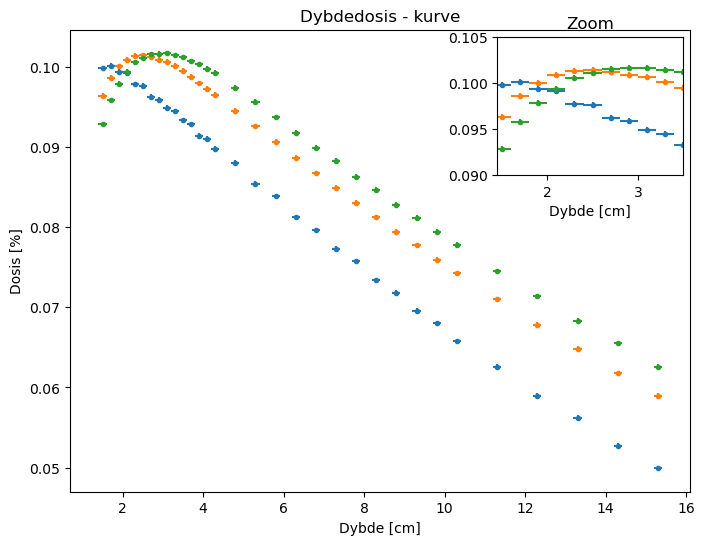

In [54]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize = (8,6))


ax.errorbar(l_6,D_6,yerr = U_D6, xerr = U_x,fmt = '.', label = '6V')
ax.errorbar(l_10,D_10,yerr = U_D10, xerr = U_x ,fmt = '.' ,label = '10V')
ax.errorbar(l_15,D_15,yerr = U_D15, xerr = U_x, fmt = '.', label = '15V')
ax.set_xlabel('Dybde [cm]')
ax.set_ylabel('Dosis [%]')
ax.set_title('Dybdedosis - kurve')

ax_inset = inset_axes(ax, width = "30%", height = "30%", loc = "upper right")
ax_inset.errorbar(l_6,D_6,yerr = U_D6, xerr = U_x,fmt = '.' )
ax_inset.errorbar(l_10,D_10,yerr = U_D10, xerr = U_x ,fmt = '.')
ax_inset.errorbar(l_15,D_15,yerr = U_D15, xerr = U_x,fmt = '.')
ax_inset.set_xlim(1.45,3.5)
ax_inset.set_ylim(0.09,0.105)
ax_inset.set_xlabel('Dybde [cm]')
ax_inset.set_title('Zoom')







C:\Users\Caro\AppData\Local\Temp\ipykernel_19956\4202772130.py:2: RuntimeWarning: overflow encountered in exp
  y = np.exp(- a*x) * c


Text(0.5, 1.0, 'Zoom')

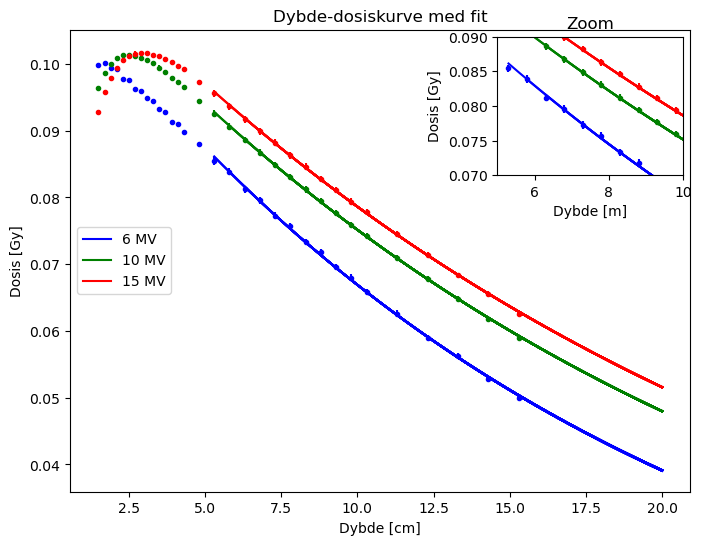

In [68]:

def exp(x,a,c):
    y = np.exp(- a*x) * c
    return y


par_6, cov_6 = curve_fit(exp,l_6[16:],D_6[16:], sigma = U_D6[16:], absolute_sigma= True)
par_10, cov_10 = curve_fit(exp,l_10[16:],D_10[16:], sigma = U_D10[16:], absolute_sigma= True)
par_15, cov_15 = curve_fit(exp,l_15[16:],D_15[16:], sigma = U_D15[16:], absolute_sigma= True)

X_6 = np.linspace(l_6[16:],20)
X_10 = np.linspace(l_10[16:],20)
X_15 = np.linspace(l_15[16:],20)


Ux_6= par_6[1]*par_6[0]*np.exp(-par_6[0]*l_6[16:])*U_x
Ux_10= par_10[1]*par_10[0]*np.exp(-par_10[0]*l_10[16:])*U_x
Ux_15= par_15[1]*par_15[0]*np.exp(-par_15[0]*l_15[16:])*U_x

U_6 = np.sqrt(Ux_6 **2+ U_D6[16:]**2)
U_10 = np.sqrt(Ux_10 **2+ U_D10[16:]**2)
U_15 = np.sqrt(Ux_15 **2+ U_D15[16:]**2)

U_62 = np.concatenate((U_D6[:16],U_6))
U_102 = np.concatenate((U_D10[:16],U_10))
U_152 = np.concatenate((U_D15[:16],U_15))


par_62, cov_62 = curve_fit(exp,l_6[16:],D_6[16:], sigma = U_6, absolute_sigma= True)
par_102, cov_102 = curve_fit(exp,l_10[16:],D_10[16:], sigma = U_10, absolute_sigma= True)
par_152, cov_152 = curve_fit(exp,l_15[16:],D_15[16:], sigma = U_15, absolute_sigma= True)

fig, ax = plt.subplots(figsize = (8,6))

ax.plot(X_6,exp(X_6,*par_62), color = 'blue', label = '6V')
ax.plot(X_10,exp(X_10,*par_102), color = 'green', label = '10V')
ax.plot(X_15,exp(X_15,*par_152), color = 'red', label = '15V')


ax.errorbar(l_6,D_6,yerr = U_62, fmt = '.', color = 'blue', label = '6V - data')
ax.errorbar(l_10,D_10,yerr = U_102 ,fmt = '.' , color = 'green', label = '10V - data ')
ax.errorbar(l_15,D_15,yerr = U_152,fmt = '.', color = 'red', label = '15V - data ')

line_6 = ax.plot(X_6, exp(X_6, *par_6), color = 'blue')[0]
line_10 = ax.plot(X_10, exp(X_10, *par_10), color = 'green')[0]
line_15 = ax.plot(X_15, exp(X_15, *par_15), color = 'red')[0]

ax.legend(handles=[line_6,line_10,line_15], labels=['6 MV', '10 MV', '15 MV'], loc='center left', bbox_to_anchor=(0, 0.5))

ax.set_xlabel('Dybde [cm]')
ax.set_ylabel('Dosis [Gy]')
ax.set_title('Dybde-dosiskurve med fit')

ax_inset = inset_axes(ax, width = "30%", height = "30%", loc = "upper right")
ax_inset.plot(X_6,exp(X_6,*par_62), color = 'blue', label = '6V')
ax_inset.plot(X_10,exp(X_10,*par_102), color = 'green', label = '10V')
ax_inset.plot(X_15,exp(X_15,*par_152), color = 'red', label = '15V')
ax_inset.errorbar(l_6,D_6,yerr = U_62, color = 'blue', fmt = '.' )
ax_inset.errorbar(l_10,D_10,yerr = U_102, color = 'green', fmt = '.')
ax_inset.errorbar(l_15,D_15,yerr = U_152, color = 'red', fmt = '.')
ax_inset.set_xlim(5,10)
ax_inset.set_ylim(0.07,0.09)
ax_inset.set_xlabel('Dybde [m]')
ax_inset.set_ylabel('Dosis [Gy]')
ax_inset.set_title('Zoom')

#ax.legend()




In [56]:
print(par_10[0])

0.04482441922794737


In [57]:
l20_6 = exp(0.20,*par_62)
l20_10 = exp(0.20,*par_102)
l20_15 = exp(0.20,*par_152)

l10_6 = exp(0.10,*par_62)
l10_10 = exp(0.10,*par_102)
l10_15 = exp(0.10,*par_152)

print(l20_6,l20_10, l20_15)

DD_6 = l20_6 / l10_6
DD_10 = l20_10 / l10_10
DD_15 = l20_15 / l10_15

print("DD'er ",DD_6, DD_10, DD_15)

TPR_6 = 1.2661* DD_6 - 0.0595
TPR_10 = 1.2661* DD_10 - 0.0595
TPR_15 = 1.2661* DD_15 - 0.0595

print("TPR" ,TPR_6,TPR_10,TPR_15)

0.11331320507467915 0.11667267659001512 0.11883006135120001
DD'er  0.994635760390686 0.9955199386729734 0.9957914324364513
TPR 1.1998083362306478 1.2009277943538517 1.201271532607791


In [58]:
#Usikerheder på parameter 
U_6 = np.sqrt(np.diagonal(cov_6))
U_10 = np.sqrt(np.diagonal(cov_10))
U_15 = np.sqrt(np.diagonal(cov_15))

print(U_6, U_10, U_15 )

U6 = np.sqrt((-D_6*np.exp(-par_6[0]*D_6)*par_6[1]*U_6[0])**2+(np.exp(-par_6[0]*D_6)*U_6[1])**2+(-par_6[0]*np.exp(-par_6[0]*D_6)*par_6[1]*U_D6)**2)
print(U6)

[0.00041302 0.00042979] [0.00036713 0.00039924] [0.00035106 0.00039055]
[0.00042753 0.00042752 0.00042754 0.00042754 0.00042758 0.00042758
 0.00042761 0.00042762 0.00042764 0.00042765 0.00042768 0.00042769
 0.00042772 0.00042773 0.00042775 0.00042779 0.00042785 0.00042789
 0.00042795 0.00042798 0.00042804 0.00042807 0.00042812 0.00042816
 0.00042821 0.00042824 0.00042829 0.00042837 0.00042845 0.00042851
 0.00042859 0.00042865]


In [59]:
# Teoretiskværdi af PDD 
print((0.667+0.0595)/1.2661)
print((0.736+0.0595)/1.2661)
print((0.761+0.0595)/1.2661)

0.5738093357554696
0.6283074006792513
0.6480530763762736


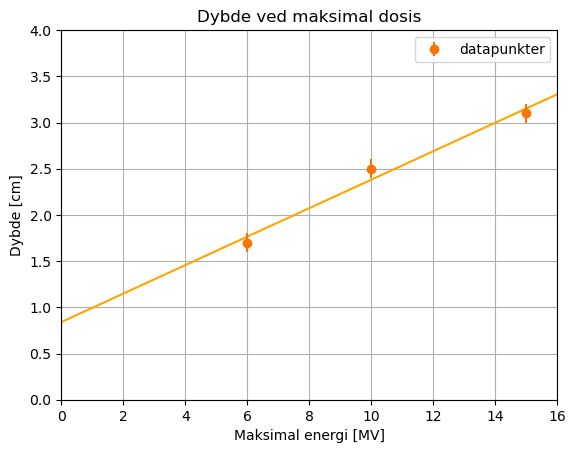

In [60]:
index6_max = np.argmax(D_6)
index10_max = np.argmax(D_10)
index15_max = np.argmax(D_15)


max = np.array([l_6[index6_max],l_10[index10_max],l_15[index15_max]])
energi = np.array([6,10,15])

def lin(x,a,b):
    y = a*x+b
    return y
U_maks= np.array([U_D6[index6_max],U_D10[index10_max],U_D15[index15_max]])
X = np.linspace(0,16,1000)
par_2, cov_2 = curve_fit(lin,energi,max,sigma = U_maks, absolute_sigma= True)

plt.plot(X,lin(X,*par_2), color = '#FFA500')

plt.errorbar(energi,max,fmt = 'o', yerr = 0.1, color = '#F97306', label = 'datapunkter')
plt.xlabel('Maksimal energi [MV]')
plt.ylabel('Dybde [cm]')
plt.xlim(0,16)
plt.ylim(0,4)
plt.grid()
plt.title('Dybde ved maksimal dosis')

plt.legend()

In [61]:
print(par_2[0])





0.15411926657053374


In [62]:
#Usikerheder på parameter 
U_6 = np.sqrt(np.diagonal(cov_62))
U_10 = np.sqrt(np.diagonal(cov_102))
U_15 = np.sqrt(np.diagonal(cov_152))

f6_max = exp(0.01,par_62[0]+U_62[0],par_62[1]+U_62[1])
f6_min = exp(0.01,par_62[0]-U_62[0],par_62[1]-U_62[1])

U6_10 = f6_max - f6_min

f10_max = exp(0.01,par_102[0]+U_102[0],par_102[1]+U_102[1])
f10_min = exp(0.01,par_102[0]-U_102[0],par_102[1]-U_102[1])

U10_10 = f10_max - f10_min

f15_max = exp(0.01,par_152[0]+U_152[0],par_152[1]+U_152[1])
f15_min = exp(0.01,par_152[0]-U_152[0],par_152[1]-U_152[1])

U15_10 = f15_max - f15_min

f6_max20 = exp(0.02,par_6[0]+U_6[0],par_6[1]+U_6[1])
f6_min20 = exp(0.02,par_6[0]-U_6[0],par_6[1]-U_6[1])

U6_20 = f6_max20 - f6_min20

f10_max20 = exp(0.02,par_10[0]+U_10[0],par_10[1]+U_10[1])
f10_min20 = exp(0.02,par_10[0]-U_10[0],par_10[1]-U_10[1])

U10_20 = f10_max20 - f10_min20

f15_max20 = exp(0.02,par_15[0]+U_15[0],par_15[1]+U_15[1])
f15_min20 = exp(0.02,par_15[0]-U_15[0],par_15[1]-U_15[1])

U15_20 = f15_max20 - f15_min20

print(U6_10, U10_10, U15_10)

print(U6_20, U10_20, U15_20)




0.0006448580228078926 0.0006439870752064647 0.0006422421301032349
0.0013582764922027007 0.0012030638748821848 0.0011613277086699042


In [63]:

UPDD_6 = np.sqrt(((1/l10_6)*U6_20)**2+(-(l20_6/l10_6**2)*U6_10)**2)

UPDD_10 = np.sqrt(((1/l10_10)*U10_20)**2+(-(l20_10/l10_10**2)*U10_10)**2)

UPDD_15 = np.sqrt(((1/l10_15)*U15_20)**2+(-(l20_15/l10_15**2)*U15_10)**2)



print(UPDD_6, UPDD_10, UPDD_15 )

0.013185077611502269 0.011631813007489177 0.011109985894180035


In [64]:

k_tp = ((273.2 + T)*p_0)/((273.2+T_0)*P)
print(k_tp)

U_k_tp = np.sqrt((p_0/((273.2+T_0)*P)*U_termo)**2+(-((273.2 + T)*p_0)/((273.2+T_0)*P**2)*U_baro)**2)
print(U_k_tp)

D_6 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_6
D_10 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_10
D_15 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_15

max_D = np.max(D_15)
Dp_6 = D_6/max_D * 100
Dp_10 = D_10/max_D *100
Dp_15 = D_15/max_D *100

print(D_6)

U_D6 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_6*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D10 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_10*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D15 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_15*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)

1.0152606181650488
0.0010232805005986664
[0.09975581 0.10007934 0.09932443 0.09916266 0.09776069 0.09759892
 0.09619695 0.09587342 0.0948489  0.09441752 0.09328516 0.09279986
 0.09134396 0.09102043 0.08978022 0.0880008  0.08541254 0.0838488
 0.08120662 0.07958896 0.07727031 0.07570657 0.073334   0.07182418
 0.06955945 0.06799571 0.06578491 0.06260351 0.05899073 0.05624071
 0.05273577 0.04993182]


Text(0.5, 1.0, 'Dybdedosis - kurve')

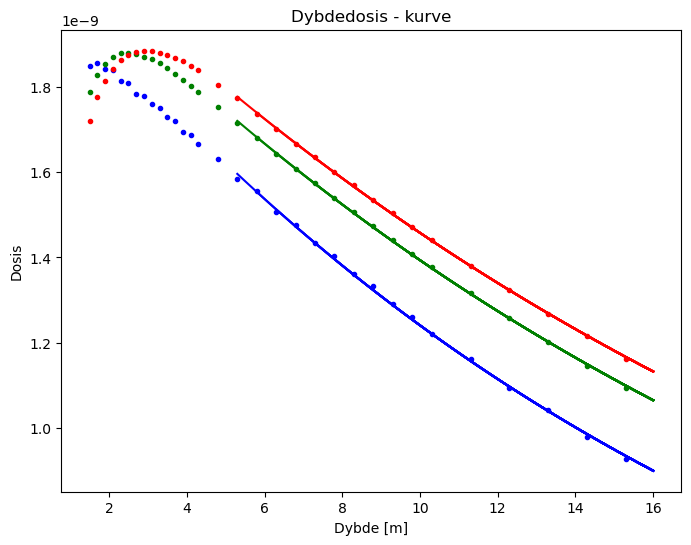

In [65]:

def exp(x,a,c):
    y = np.exp(- a*x) * c
    return y


par_6, cov_6 = curve_fit(exp,l_6[16:],m_6[16:], sigma = U_D6[16:], absolute_sigma= True)
par_10, cov_10 = curve_fit(exp,l_10[16:],m_10[16:], sigma = U_D10[16:], absolute_sigma= True)
par_15, cov_15 = curve_fit(exp,l_15[16:],m_15[16:], sigma = U_D15[16:], absolute_sigma= True)

X_6 = np.linspace(l_6[16:],16)
X_10 = np.linspace(l_10[16:],16)
X_15 = np.linspace(l_15[16:],16)



fig, ax = plt.subplots(figsize = (8,6))

ax.plot(X_6,exp(X_6,*par_6), color = 'blue', label = '6V')
ax.plot(X_10,exp(X_10,*par_10), color = 'green', label = '10V')
ax.plot(X_15,exp(X_15,*par_15), color = 'red', label = '15V')


ax.errorbar(l_6,m_6 ,fmt = '.', color = 'blue', label = '6V - data')
ax.errorbar(l_10,m_10 ,fmt = '.' , color = 'green', label = '10V - data ')
ax.errorbar(l_15,m_15, fmt = '.', color = 'red', label = '15V - data ')
ax.set_xlabel('Dybde [m]')
ax.set_ylabel('Dosis')
ax.set_title('Dybdedosis - kurve')



In [66]:
print(par_6[0], par_10[0],par_15[0])

0.05358379862191524 0.04482441921949439 0.042108111727205785


In [67]:
print(l_6[16])

5.3
